<a href="https://colab.research.google.com/github/procolab/MS_ANN_NIDS/blob/main/UOU_MSC(CS)_2nd_Sem_Himanshu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Auther**</br>
**Project**- *Intrusion Detection System Using Artificial Neural Network*</br>
**Name**- *Himanshu Chauhan*</br>
**Enrollment Number**- *23326680*</br>
**Email**- *himanshuutail@gmail.com*</br>
**GitHub**- *https://github.com/procolab/MS_ANN_NIDS.git*</br>

</br>

**Problem Statement:** The task is to build a network intrusion detector, a predictive model capable of distinguishing between bad connections, called intrusions or attacks, and good normal connections.

</br>

**Introduction:**
Intrusion Detection System is a software application to detect network intrusion using various machine learning algorithms. IDS monitors a network or system for malicious activity and protects a computer network from unauthorized access from users, including perhaps insider. The intrusion detector learning task is to build a predictive model (i.e. a classifier) capable of distinguishing between ‘bad connections’ (intrusion/attacks) and a ‘good (normal) connections’.
</br>
**Attacks fall into four main categories:**</br>
**#DOS:** denial-of-service, e.g. syn flood.</br>
**#R2L:** unauthorized access from a remote machine, e.g. guessing password.</br>
**#U2R:** unauthorized access to local superuser (root) privileges, e.g., various “buffer overflow” attacks.</br>
**#probing:** surveillance and another probing, e.g., port scanning.</br>

**Dataset Description:** Data files:

*   **kddcup.names :** A list of features.
*   **kddcup.data.gz :** The full data set
*   **kddcup.data_10_percent.gz :** A 10% subset.
*   **kddcup.newtestdata_10_percent_unlabeled.gz**
*   **kddcup.testdata.unlabeled.gz**
*   **kddcup.testdata.unlabeled_10_percent.gz**
*   **corrected.gz :** Test data with corrected labels.
*   **training_attack_types :** A list of intrusion types.
*   **typo-correction.txt :** A brief note on a typo in the data set that has been corrected.

**----------------------------------------------------------------------**

Building a **Network Intrusion Detection System (NIDS)** using an **Artificial Neural Network (ANN)** in Google Colab involves several steps, including data loading, preprocessing, model creation, training, and testing. I'll provide a detailed code example, including explanations at each stage, to ensure in-depth understanding.

**Step 1:** Import Necessary Libraries

In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from google.colab import drive

**Step 2:** Mount Google Drive (for dataset access)

In [72]:
# Mount Google Drive to access datasets
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Step 3:** Load and Preprocess the Dataset

We'll use the **KDD Cup 1999 dataset**, a standard dataset for NIDS tasks. Ensure the dataset is uploaded to your Google Drive.

In [73]:
# Load the dataset from Google Drive
file_path = '/content/drive/MyDrive/Shared/kddcup/kddcup.data_10_percent_corrected'

# Define column names
column_names = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment",
                "urgent","hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted",
                "num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login",
                "is_guest_login","count","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate",
                "same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
                "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
                "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
                "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

data = pd.read_csv(file_path, header=None, names=column_names)

# Explore the dataset
print("Dataset shape:", data.shape)
print("First few rows of the dataset:")
print(data.head())

Dataset shape: (494021, 42)
First few rows of the dataset:
   duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        181       5450     0   
1         0           tcp    http   SF        239        486     0   
2         0           tcp    http   SF        235       1337     0   
3         0           tcp    http   SF        219       1337     0   
4         0           tcp    http   SF        217       2032     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                   9   
1               0       0    0  ...                  19   
2               0       0    0  ...                  29   
3               0       0    0  ...                  39   
4               0       0    0  ...                  49   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     1.0                     0.0   
1                     1.0                     0.0   
2     

**Step 4:** Encode Categorical Features

We need to convert categorical features into numerical values using Label Encoding.

In [74]:
# Encode categorical features
le = LabelEncoder()
data['protocol_type'] = le.fit_transform(data['protocol_type'])
data['service'] = le.fit_transform(data['service'])
data['flag'] = le.fit_transform(data['flag'])

# Encode the target variable (labels)
data['label'] = data['label'].apply(lambda x: 0 if x == 'normal.' else 1)

# Verify encoding
print("Encoded dataset:")
print(data.head())

Encoded dataset:
   duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0         0              1       22     9        181       5450     0   
1         0              1       22     9        239        486     0   
2         0              1       22     9        235       1337     0   
3         0              1       22     9        219       1337     0   
4         0              1       22     9        217       2032     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                   9   
1               0       0    0  ...                  19   
2               0       0    0  ...                  29   
3               0       0    0  ...                  39   
4               0       0    0  ...                  49   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     1.0                     0.0   
1                     1.0                     0.0   
2                     1.0     

**Step 5:** Feature Scaling

Normalize the data to ensure that each feature contributes equally to the model.

In [75]:
# Separate features and target variable
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Standardize the feature values
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Verify scaling
print("First few rows of scaled features:")
print(X[:5])

First few rows of scaled features:
[[-6.77917205e-02  9.25753062e-01 -1.04067101e-01  5.14273922e-01
  -2.87852770e-03  1.38664408e-01 -6.67341765e-03 -4.77201854e-02
  -2.57146810e-03 -4.41359116e-02 -9.78218463e-03  2.39697959e+00
  -5.67868416e-03 -1.05519522e-02 -4.67567073e-03 -5.64001207e-03
  -1.12320815e-02 -9.91897493e-03 -2.76318157e-02  0.00000000e+00
   0.00000000e+00 -3.72626624e-02 -1.52141663e+00 -1.15664009e+00
  -4.64089752e-01 -4.63520471e-01 -2.47960476e-01 -2.48631282e-01
   5.36987403e-01 -2.55243389e-01 -2.03633068e-01 -3.45153588e+00
  -1.69431452e+00  5.99396187e-01 -2.82866677e-01 -1.02207729e+00
  -1.58629293e-01 -4.64417626e-01 -4.63202392e-01 -2.52039522e-01
  -2.49464005e-01]
 [-6.77917205e-02  9.25753062e-01 -1.04067101e-01  5.14273922e-01
  -2.81983614e-03 -1.15778692e-02 -6.67341765e-03 -4.77201854e-02
  -2.57146810e-03 -4.41359116e-02 -9.78218463e-03  2.39697959e+00
  -5.67868416e-03 -1.05519522e-02 -4.67567073e-03 -5.64001207e-03
  -1.12320815e-02 -9.9

**Step 6:** Split Data into Training and Testing Sets

We’ll split the data into **70% training** and **30% testing**.

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (345814, 41)
Testing set shape: (148207, 41)


**Step 7:** Build the ANN Model

We’ll create a deep learning model using Keras, consisting of multiple layers including **input**, **hidden**, and **output** layers.

In [77]:
# Initialize the ANN model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))  # Add dropout for regularization

# Second hidden layer
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))  # Add dropout for regularization

# Third hidden layer
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(0.5))  # Add dropout for regularization

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                2688      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                

**Step 8:** Train the Model

Train the model using the training data. We’ll also include validation data to monitor the model’s performance during training.

Epoch 1/20
4323/4323 [==============================] - 24s 5ms/step - loss: 0.0549 - accuracy: 0.9838 - val_loss: 0.0093 - val_accuracy: 0.9984
Epoch 2/20
4323/4323 [==============================] - 16s 4ms/step - loss: 0.0161 - accuracy: 0.9961 - val_loss: 0.0077 - val_accuracy: 0.9988
Epoch 3/20
4323/4323 [==============================] - 16s 4ms/step - loss: 0.0117 - accuracy: 0.9964 - val_loss: 0.0088 - val_accuracy: 0.9979
Epoch 4/20
4323/4323 [==============================] - 16s 4ms/step - loss: 0.0097 - accuracy: 0.9968 - val_loss: 0.0101 - val_accuracy: 0.9990
Epoch 5/20
4323/4323 [==============================] - 18s 4ms/step - loss: 0.0099 - accuracy: 0.9970 - val_loss: 0.0115 - val_accuracy: 0.9990
Epoch 6/20
4323/4323 [==============================] - 17s 4ms/step - loss: 0.0090 - accuracy: 0.9967 - val_loss: 0.0123 - val_accuracy: 0.9990
Epoch 7/20
4323/4323 [==============================] - 18s 4ms/step - loss: 0.0099 - accuracy: 0.9971 - val_loss: 0.0145 - val_ac

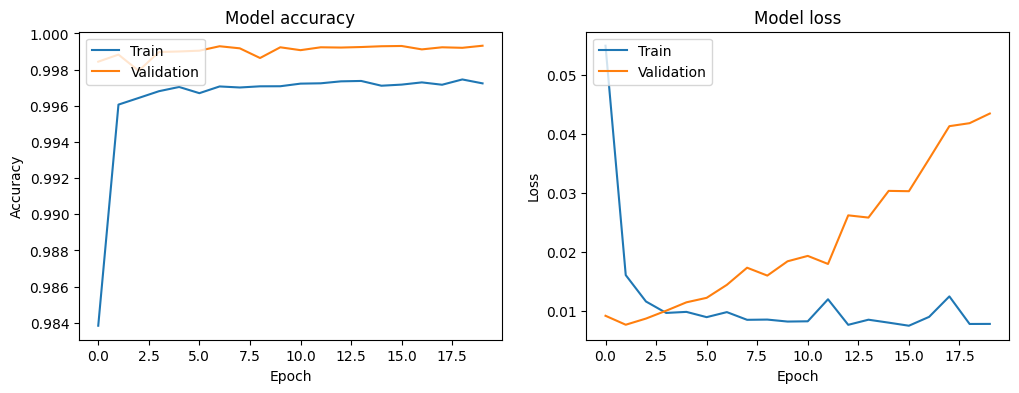

In [78]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=1)

# Visualize training process
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()

**Step 9:** Evaluate the Model on Test Data

Evaluate the model’s performance using the testing dataset.

In [79]:
# Evaluate the model
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Print the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

4632/4632 [==============================] - 13s 3ms/step
Accuracy: 0.9992
Confusion Matrix:
[[ 29141     43]
 [    72 118951]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29184
           1       1.00      1.00      1.00    119023

    accuracy                           1.00    148207
   macro avg       1.00      1.00      1.00    148207
weighted avg       1.00      1.00      1.00    148207



**Step 10:** Save and Load the Model (Optional)

You can save the trained model for future use or deployment.

In [80]:
# Save the model
model.save('/content/drive/My Drive/NIDS_ANN_Model.h5')

# Load the model
# from tensorflow.keras.models import load_model
# model = load_model('/content/drive/My Drive/NIDS_ANN_Model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Explanation:**</br>
**Data Preprocessing:** The data is encoded and scaled to prepare it for training. This step ensures the model handles the data correctly.</br>
**Model Construction:** The ANN model is built with multiple dense layers and dropout layers to prevent overfitting. The model is compiled using the Adam optimizer and binary cross-entropy loss.</br>
**Training and Validation:** The model is trained with the training set, and validation is done to monitor overfitting or underfitting.</br>
**Testing and Evaluation:** The model's performance is evaluated using the test set, and key metrics such as accuracy, confusion matrix, and classification report are generated.</br>
**Model Saving:** The trained model can be saved for future use or deployment, allowing you to reload and use it without retraining.